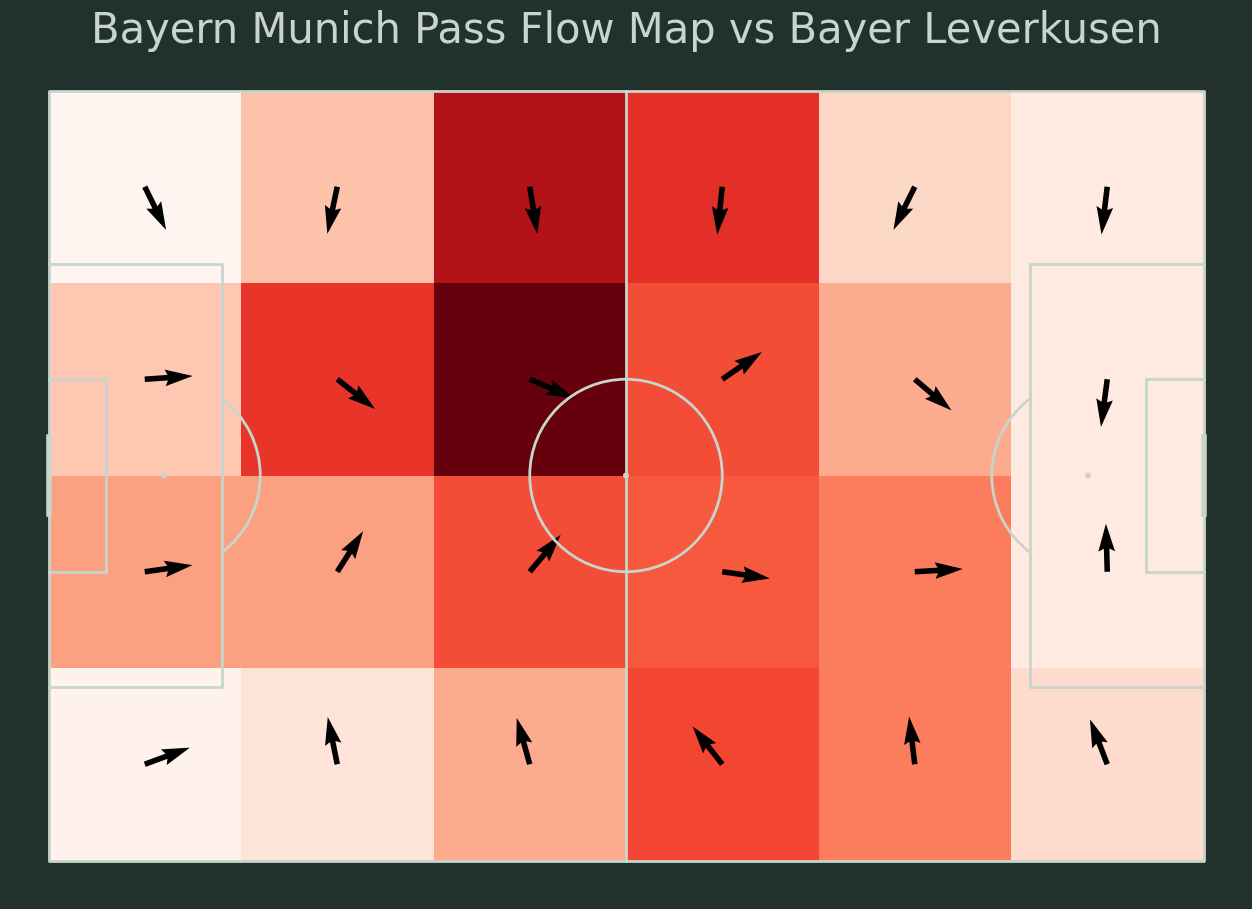

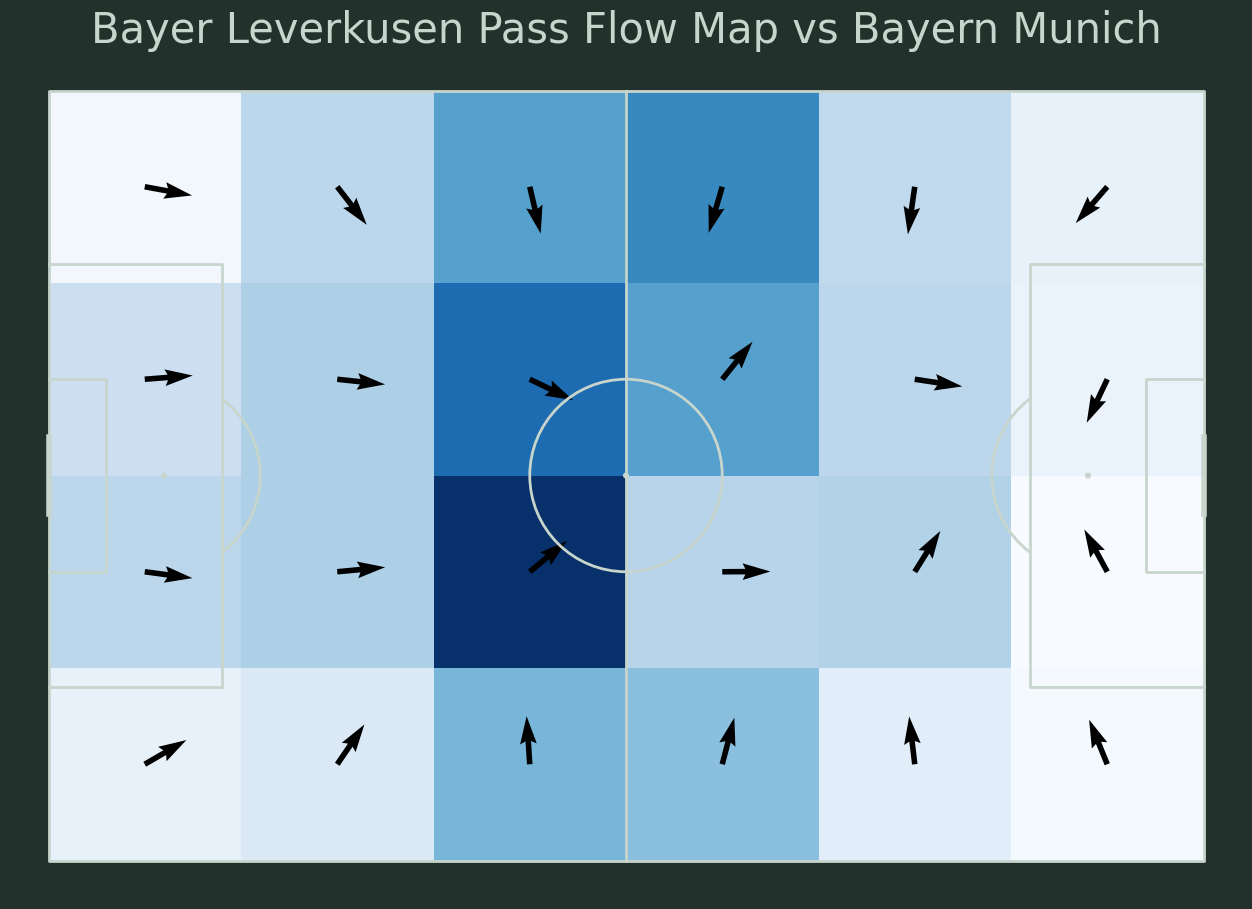

In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from mplsoccer import Pitch, FontManager, Sbopen

rcParams['text.color'] = '#c7d5cc' 

# Event-Daten
parser = Sbopen()
df, related, freeze, tactics = parser.event(3895074)

team1, team2 = df.team_name.unique()

# --------- Team 1 Pass Flow Map ---------
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1)
df_pass1 = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

bs_heatmap1 = pitch.bin_statistic(df_pass1.x, df_pass1.y, statistic='count', bins=bins)
hm1 = pitch.heatmap(bs_heatmap1, ax=ax, cmap='Reds')

fm1 = pitch.flow(df_pass1.x, df_pass1.y, df_pass1.end_x, df_pass1.end_y,
                 color='black', arrow_type='same', arrow_length=5, bins=bins, ax=ax)

ax.set_title(f'{team1} Pass Flow Map vs {team2}', fontsize=30, pad=-20)

plt.show()


# --------- Team 2 Pass Flow Map ---------
mask_team2 = (df.type_name == 'Pass') & (df.team_name == team2)
df_pass2 = df.loc[mask_team2, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

bs_heatmap2 = pitch.bin_statistic(df_pass2.x, df_pass2.y, statistic='count', bins=bins)
hm2 = pitch.heatmap(bs_heatmap2, ax=ax, cmap='Blues')

fm2 = pitch.flow(df_pass2.x, df_pass2.y, df_pass2.end_x, df_pass2.end_y,
                 color='black', arrow_type='same', arrow_length=5, bins=bins, ax=ax)

ax.set_title(f'{team2} Pass Flow Map vs {team1}', fontsize=30, pad=-20)

plt.show()